# Logistic Regression with Python

In [1]:
# Using the algorithm we will try to predict if the person survived or not the prediction will be based on the 
# several other parameters such as age, passenger, classm\, gender etc

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

## Reading Data from Dataset

In [4]:
dataframe = pd.read_csv('titanic.csv')
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSp - Number of siblings/spouses abroad
parch - No. of parents/ children abroad
embarked - Port of embarkation( C - Chrbourg, Q - Queenstown, S = Southampton)
survival (0 - No, 1- Yes)

## Explanatory Data Analysis

### Checking for missing data

<AxesSubplot:>

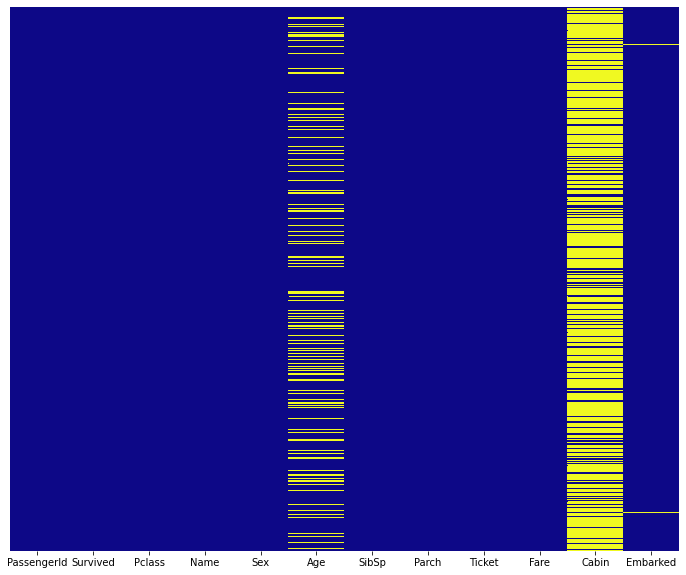

In [6]:
plt.figure(figsize = (12, 10))
sns.heatmap(dataframe.isnull(), yticklabels = False, cbar = False, cmap= 'plasma')


In [7]:
# Some of the age data is missing and can be filled with a certain value. But the cabin column has a lot of missing data and it is unlikely 
# that we can process it therefore we will drop it

## Plotting Data of number of Survivers and number of Non survivers

<AxesSubplot:xlabel='Survived', ylabel='count'>

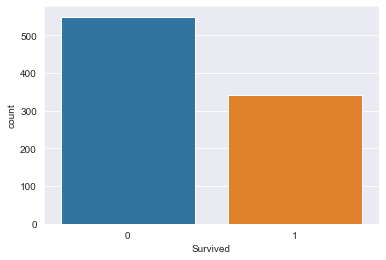

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = dataframe)

## Plotting Data of number of Survivers and number of Non survivers based on gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

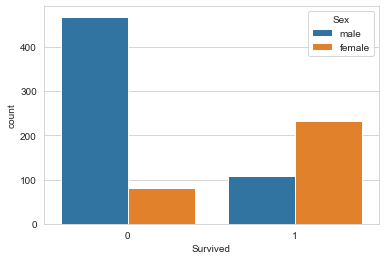

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = dataframe)

## Checking and Plotting Average Fare for all three Passenger Classes

Text(0, 0.5, 'Average Fare')

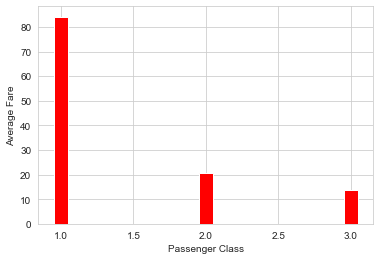

In [10]:
pas_class = dataframe.groupby(["Pclass"]).mean()
plt.bar(pas_class.index, pas_class["Fare"], width = 0.1, color = "r")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")

## Plotting Survival rate for all three Passenger Classes

<AxesSubplot:xlabel='Survived', ylabel='count'>

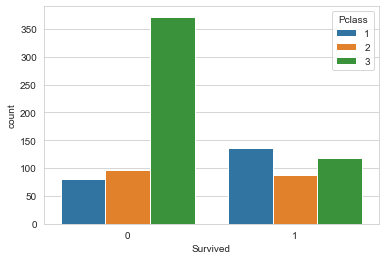

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = dataframe)
#  the hue parameter denotes which column decides the kind of color, i.e. it's red, or green

## Plotting Survival rate for all three Embarkment locations

<AxesSubplot:xlabel='Survived', ylabel='count'>

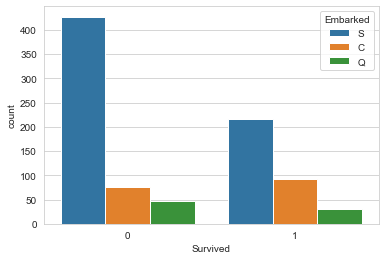

In [12]:
#C : Cherbourg , Q = Queenstown, S = Southampton
sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , hue= 'Embarked', data = dataframe)


## Age histogram

<AxesSubplot:>

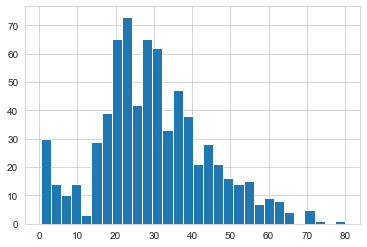

In [13]:
dataframe['Age'].hist(bins = 30)
# The towers or bars of a histogram are called bins. 
# The height of each bin shows how many values from that data fall into that range.
# The default value of the number of bins to be created in a histogram is 10

## Fare Histogram

<AxesSubplot:>

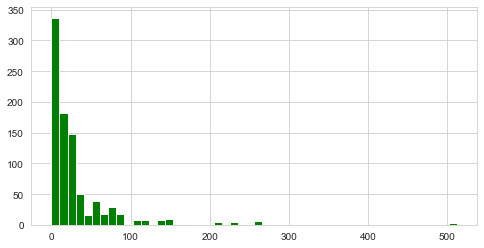

In [14]:
dataframe['Fare'].hist(color = 'green', bins = 50, figsize=(8,4))

### Density plot for surviving passengers and Non surviving passengers with respect to Age

(-20.0, 200.0)

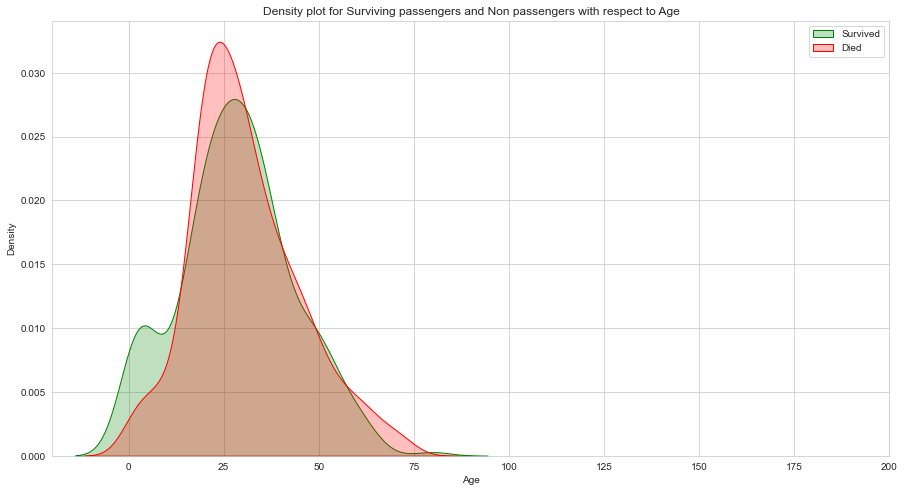

In [15]:
fig = plt.figure(figsize = (15, 8))
# figsize is a tuple of the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch)
axes = sns.kdeplot(dataframe["Age"][dataframe.Survived == 1], color = "green", shade = True)
axes = sns.kdeplot(dataframe["Age"][dataframe.Survived == 0], color = "red", shade = True)

# KDE kernel density estimate represents the data using a continuous probability density curve in one or more dimensions.
plt.legend(["Survived", "Died"])
plt.title('Density plot for Surviving passengers and Non passengers with respect to Age')
axes.set_xlabel('Age')
plt.xlim(-20, 200)
# used to set or get limits for X-axis : xlim

### Density plot for surviving passengers and Non surviving passengers with respect to Age

(-20.0, 200.0)

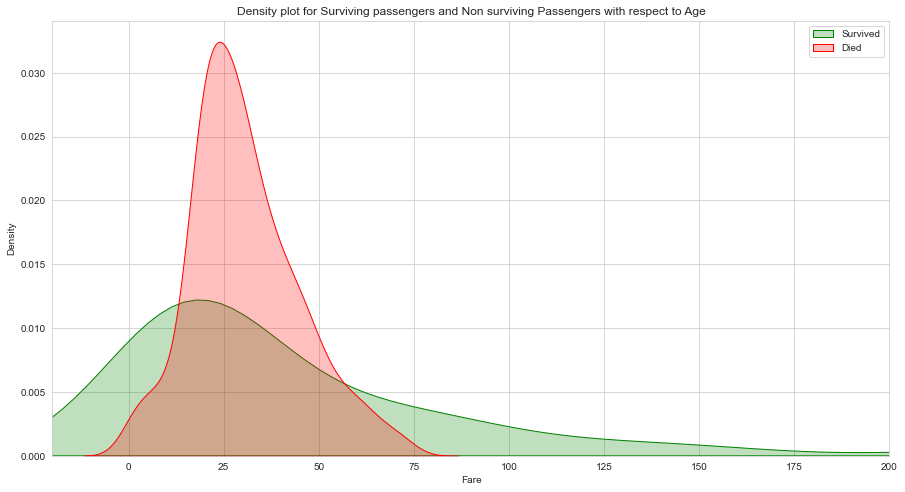

In [16]:
fig = plt.figure(figsize = (15,8))
axes = sns.kdeplot(dataframe['Fare'][dataframe.Survived == 1], color = "green", shade = True)
sns.kdeplot(dataframe["Age"][dataframe.Survived == 0], color = "red", shade = True)
plt.legend(['Survived', 'Died'])
plt.title("Density plot for Surviving passengers and Non surviving Passengers with respect to Age")
axes.set_xlabel('Fare')
plt.xlim(-20, 200)

## Data Cleaning

The column "Passengerid" is just a serial number and will not help with our prediction therefore we will drop it. Similarly we will also 
remove Name and Ticket columns as they are text columns along with the fact that as of now we will not be able to relate them with the Survival chance.
Cabin column needs to be removed as lot of data is missing in that column.


## Removing unwanted columns from data frame

In [18]:
dataframe.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


As the age data was missing for some of the row we can fill the missing age data with the mean age of all the passengers


## Grouping data frame with respect to Pclass and calculating mean

In [20]:
pas_class = dataframe.groupby(["Pclass"]).mean()
pas_class

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


## Box Plot to get an idea of mean age among Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

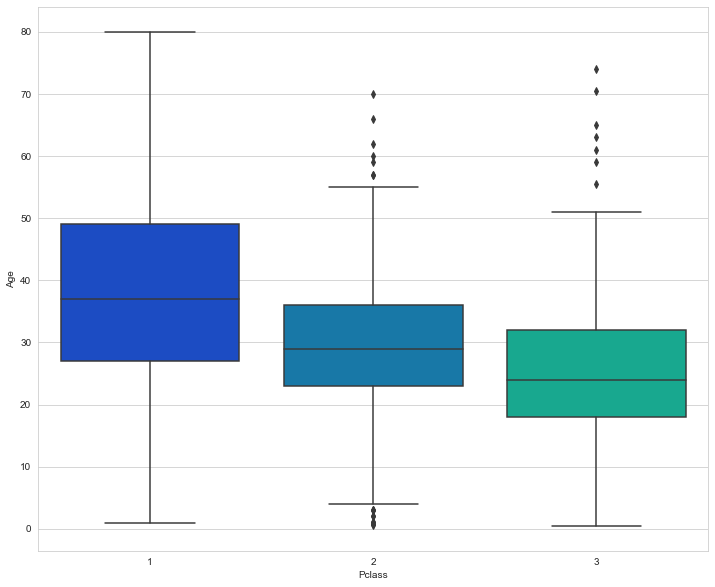

In [21]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "Pclass", y = "Age", data = dataframe, palette = "winter")


In [22]:
# passengers in the higher classes were older which is also relatable because older people were probably the ones who could afford the 
# higher passenger classes

## Creating function which will substitute age based on Pclass

In [25]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
#         return pas_class.loc(1, "Age")
        elif Pclass == 2:
            return 29
#       return pas_class.loc(2, "Age")
        else:
           return 25
#       return pas_class.loc(3, "Age")
    else:
        return Age


In [26]:
dataframe['Age'] = dataframe[['Age', 'Pclass']].apply(fill_age, axis = 1)

## Checking missing data

<AxesSubplot:>

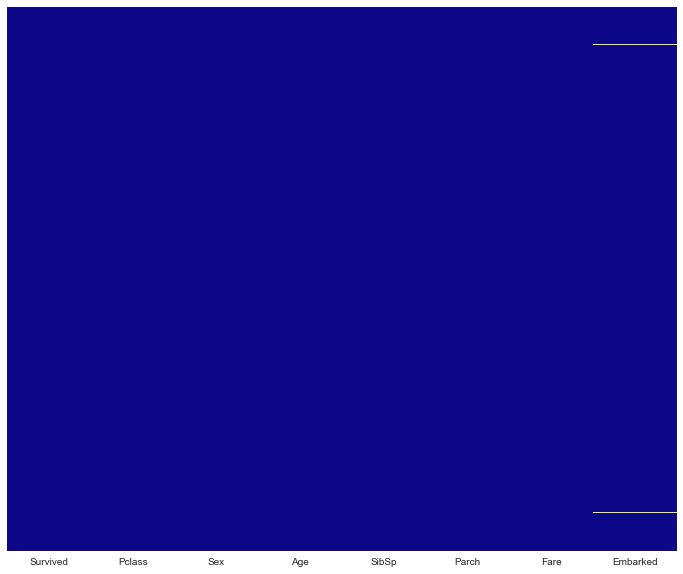

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(dataframe.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')
# yticklabels:- If you specify the labels, then the y-axis tick values and tick labels no longer update 
# automatically based on changes to the axes
# cbar:- Colorbars are a visualization of the mapping from scalar values to colors
# cmap:-  a colormap instance or registered colormap name

In [28]:
dataframe["Embarked"].isnull().value_counts()      
# checking no of missing data counts

False    889
True       2
Name: Embarked, dtype: int64

## Dropping missing data

In [30]:
dataframe.dropna(inplace = True)
# Keep the DataFrame with valid entries in the same variable.

## Converting Categorical features
Converting categorical features to dummy variable using pandas so that our model is able to directly take in those features as inputs

In [31]:
# A dummy variable is a variable that takes values of 0 and 1
# A categorical variable (also called qualitative variable) is a variable that can take on one of a limited, 
# and usually fixed, number of possible values
dataframe["Embarked"].unique()
# checking value of unique data in embarked column

array(['S', 'C', 'Q'], dtype=object)

In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [33]:
# get dummies function will return a representation of data columns in binary format columns
# drop_first will drop help the function to represent the data in unique-1 data columns
sex = pd.get_dummies(dataframe['Sex'], drop_first = True)
embark = pd.get_dummies(dataframe['Embarked'], drop_first = True)


In [34]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


## Removing the columns for which dummy variables have been created

In [36]:
dataframe.drop(['Embarked', 'Sex'], inplace = True, axis = 1)

## Concatenating dummy variable columns with dataframe

In [37]:
dataframe = pd.concat([dataframe, sex, embark], axis = 1)

In [38]:
dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistics Regression Model
### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Survived', axis = 1), 
                                                    dataframe['Survived'], test_size = 0.30, random_state = 101)

## Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression(max_iter = 800)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [45]:
predictions = logmodel.predict(X_test)

## Evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[150,  13],
       [ 31,  73]], dtype=int64)

<AxesSubplot:>

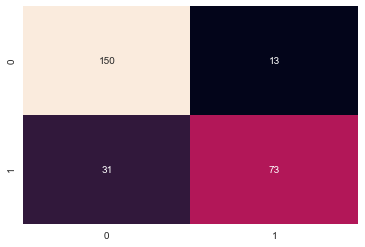

In [48]:
sns.heatmap(cnf_matrix, annot = True, fmt = 'g', cbar = False)
# creating heatmap for confusion matrix

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



### picking up 1 set of data, checking actual survival output, and feeding same set of data to our model and getting predicted output

In [50]:
index_num = 0
# change this number to select row from testing data
# number should be an index for testing data frame
# test data was formed randomly, hence the index is not continous
print(X_test.iloc[index_num])
print("\n\nActually survived or not survived", y_test.iloc[index_num])

Pclass     3.00
Age       25.00
SibSp      0.00
Parch      0.00
Fare       8.05
male       1.00
Q          0.00
S          1.00
Name: 511, dtype: float64


Actually survived or not survived 0


In [51]:
test_sample = X_test.iloc[index_num].to_numpy().reshape(1,-1)
predicted_result = logmodel.predict(test_sample)
print("Prediction Result:", predicted_result)

Prediction Result: [0]


## Prediction Probability

In [53]:
predict_prob = logmodel.predict_proba(X_test)[:,1]
predict_prob

array([0.10902359, 0.13329804, 0.76493645, 0.92040407, 0.1347678 ,
       0.03315461, 0.11695405, 0.23100015, 0.07461718, 0.59169739,
       0.78166597, 0.95464604, 0.10899912, 0.5976588 , 0.10925395,
       0.13095604, 0.91417958, 0.82722944, 0.54590307, 0.10115813,
       0.10912085, 0.08875558, 0.40676661, 0.32094003, 0.05780205,
       0.45980339, 0.64301181, 0.49687759, 0.12404978, 0.32126469,
       0.10449241, 0.24848593, 0.01530062, 0.10896012, 0.11305076,
       0.13185867, 0.70183631, 0.05676217, 0.12346929, 0.11538905,
       0.53232322, 0.15112197, 0.1262677 , 0.93531747, 0.6131405 ,
       0.10714366, 0.63456321, 0.88828139, 0.10463803, 0.27839789,
       0.50035472, 0.79409505, 0.16855447, 0.13132683, 0.10886498,
       0.06640852, 0.44460518, 0.08373015, 0.10230636, 0.91253387,
       0.59169739, 0.94269209, 0.8876232 , 0.09165984, 0.18094347,
       0.0413497 , 0.12164586, 0.42776686, 0.05037002, 0.1084099 ,
       0.35200556, 0.14580201, 0.62272671, 0.88529584, 0.07456

## Printing Survival probability of the above selected passenger

In [55]:
predict_sample_prob = logmodel.predict_proba(test_sample)[:,1]
predict_sample_prob

array([0.10902359])

## Scatter plot of predicted survivors and Non survivors wrt to age

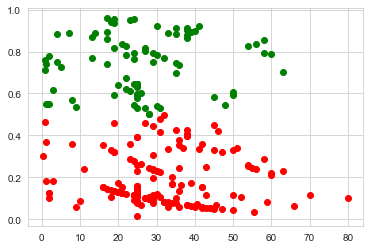

In [56]:
plt.scatter(X_test["Age"] [predictions==0], predict_prob[predictions==0],color = "red")
plt.scatter(X_test["Age"] [predictions==1], predict_prob[predictions==1],color = "green")


## Manually thresholding probability

In [ ]:
plt.scatter(X_test["Age"] [predictions==1], predict_prob[predict],color = "green")
plt.scatter(X_test["Age"] [predictions==1], predict_prob[predictions==1],color = "green")
